In [6]:
# Import packages
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

from sklearn import metrics
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler

In [8]:
df = pd.read_csv('../eda/combined_profile.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8536 entries, 0 to 8535
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   username           8536 non-null   object 
 1   age                8535 non-null   float64
 2   occupation         8536 non-null   object 
 3   status             8536 non-null   object 
 4   gender             8536 non-null   object 
 5   filtered sentence  8536 non-null   object 
 6   y                  8536 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 466.9+ KB


In [10]:
df.dropna(inplace=True)

The shape of our features is: (8536, 7)


,age,y
count,8535.000000,8536.000000
mean,42.567780,0.346064
std,11.454777,0.475742
min,18.000000,0.000000
25%,33.000000,0.000000
50%,42.000000,0.000000
75%,51.000000,1.000000
max,85.000000,1.000000


In [25]:
df['occupation'].unique().tolist()

['Retired',
 'ESTUDIANTE',
 'Construction',
 'Social worker',
 'retired',
 'Executive',
 'journalist',
 'Designer',
 'Chef',
 'Entrepreneur',
 'Student',
 'Medical',
 'Service',
 'Author',
 'Engineer',
 'lawyer',
 'Teacher',
 'Care worker',
 'Cobranza',
 'Chofer',
 'Lawyer',
 'Disabled',
 'IT Technician',
 'Self employed',
 'Waitress',
 'estudiante',
 'Manager',
 'Agricultural Contractor',
 'Arquitecto',
 'PhD student',
 'manager',
 'Marketing',
 'Telecomunicaciones',
 'health',
 'self-employed',
 'Tech',
 'Sales',
 'Handyman',
 'engineer',
 'Civil Engineer',
 'Management',
 'Business',
 'nurse',
 'Journalist',
 'educator',
 'Engineering',
 'airline pilot',
 'Artist',
 'Ingeniero de sistemas',
 'Operations Manager',
 'Musician',
 'Factory Worker',
 'Doctor',
 'Higher Education',
 'Ingeniero',
 'Restaurant',
 'Electrician',
 'Gobierno',
 'Carpenter',
 'Unemployed',
 'Retire',
 'Education',
 'Business owner',
 'Laborer',
 'Welder',
 'Transport',
 'Healthcare',
 'Receptionist',
 'INGENIER

In [26]:
df['occupation'].value_counts()

 military                 376
 self employed            271
 student                  262
 –                        239
 engineer                 211
                         ... 
Installer                   2
Técnico administrativo      2
Oficial de seguridad        2
Contable                    2
 Sales/Marketing            1
Name: occupation, Length: 1016, dtype: int64

In [7]:
# label encoding for status and gender columns
labelencoder = LabelEncoder()
df[['status_encoded','gender_encoded']]=df[['status','gender']].apply(labelencoder.fit_transform)

In [11]:
# binning for age column
bins=[18,34,48,60,95]
label=['18-34','35-48','49-60','61-85']
df['age_group']= pd.qcut(df['age'],4)

In [13]:
# label encoding for age column
df['age_group_encoded'] = labelencoder.fit_transform(df['age_group'])

In [14]:
df['age_group_encoded'].value_counts()

0    2250
2    2183
1    2085
3    2017
Name: age_group_encoded, dtype: int64

In [15]:
# features
X = df.loc[:,['status_encoded','gender_encoded','age_group_encoded']]
X.sample(5)

,status_encoded,gender_encoded,age_group_encoded
6795,3,1,1
6039,5,1,1
7732,10,1,2
4247,15,1,0
5039,15,1,0


In [16]:
# target
y = df["y"]

In [17]:
# split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
# initialise Decision Tree
clf = DecisionTreeClassifier(criterion='gini',random_state=99) 

# train model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=99)

[Text(0.5, 0.75, 'X[0] <= 10.5\ngini = 0.454\nsamples = 6828\nvalue = [4454, 2374]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2374\nvalue = [0, 2374]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4454\nvalue = [4454, 0]')]

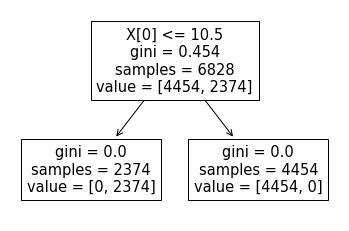

In [19]:
tree.plot_tree(clf)

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image

feature_cols = ['', '','','','']

dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, 
                      feature_names = feature_cols,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [20]:
# get predictions and compare results
predictions = clf.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results_df.sample(10)

,Actual,Predicted
378,0,0
287,0,0
1034,0,0
7860,1,1
2175,0,0
7721,1,1
4013,0,0
7944,1,1
3783,0,0
3594,0,0


In [21]:
# Accuracy
accuracy = accuracy_score(y_test,predictions)
print("Accuracy:",accuracy)

Accuracy: 1.0


In [54]:
# Precision and Recall
precision = metrics.precision_score(y_test, predictions)
recall = metrics.recall_score(y_test, predictions)
f_measure = metrics.f1_score(y_test, predictions)
print("Precision:",precision)
print("Recall:",recall)
print("F-measure:",f_measure)

Precision: 1.0
Recall: 1.0
F-measure: 1.0


Feature Enginnering 

In [11]:
# create a copy of the dataframe
engineer_df = df.copy()
engineer_df.sample(5)

NameError: name 'df' is not defined

In [12]:
# feature aggregate 
engineer_df[""] = engineer_df[""] + engineer_df[""]
engineer_df.sample(5)

NameError: name 'engineer_df' is not defined

Modelling Features 

In [13]:
# Features
X = engineer_df[["",""]]
# Target
y = engineer_df[""]
X.sample(5)

NameError: name 'engineer_df' is not defined

In [14]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

NameError: name 'X' is not defined

Decision Tree

In [15]:
# Train model
dt_clf = DecisionTreeClassifier(criterion='gini')  
dt_clf.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [16]:
feature_cols = ["",""]

dot_data = StringIO()
export_graphviz(dt_clf, out_file = dot_data, 
                      feature_names = feature_cols,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

NameError: name 'StringIO' is not defined

In [17]:
# Compare results
dt_predictions = dt_clf.predict(X_test)
dt_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': dt_predictions})
dt_results_df.sample(10)

NameError: name 'X_test' is not defined

In [18]:
# Accuracy
dt_accuracy = accuracy_score(y_test,dt_predictions)
print("Accuracy:",dt_accuracy)

NameError: name 'y_test' is not defined

In [19]:
# Precision and Recall
dt_precision = metrics.precision_score(y_test, dt_predictions)
dt_recall = metrics.recall_score(y_test, dt_predictions)
dt_f_measure = metrics.f1_score(y_test, dt_predictions)
print("Precision:",dt_precision)
print("Recall:",dt_recall)
print("F-measure:",dt_f_measure)

NameError: name 'y_test' is not defined

Decision Tree data split visulisation 

In [20]:
groups = engineer_df.groupby("fraud")
for name, group in groups:
    plt.plot(group[""], group[""], marker="o", linestyle="", label=name)
plt.plot([9.4,9.4], [1,9], linestyle='-')
plt.plot([5,12], [1.65,1.65], linestyle='-')
plt.legend()
plt.show()

NameError: name 'engineer_df' is not defined